In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
cancer_data=pd.read_csv("practice_data/wisconsin breast cancer data/data.csv")

In [3]:
cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
cancer_data.shape

(569, 33)

In [6]:
#since we know that the last column has all of the null values and the id has no significance whatsoever,
#so to get rid of them is the best option.
cancer_data.drop(["Unnamed: 32","id"], inplace=True, axis=1)
cancer_data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_data.shape

(569, 31)

# Data Anaysis

B    357
M    212
Name: diagnosis, dtype: int64


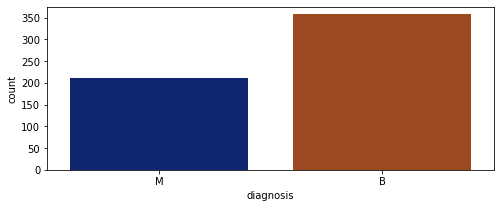

In [8]:
plt.figure(figsize=(8,3))
sns.countplot(x="diagnosis", data= cancer_data, palette="dark")
print(cancer_data.diagnosis.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


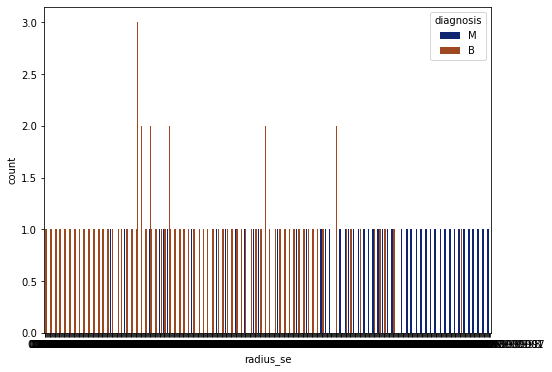

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x="radius_se", hue="diagnosis", data=cancer_data, palette="dark")
print(cancer_data.diagnosis.value_counts())


B    357
M    212
Name: diagnosis, dtype: int64


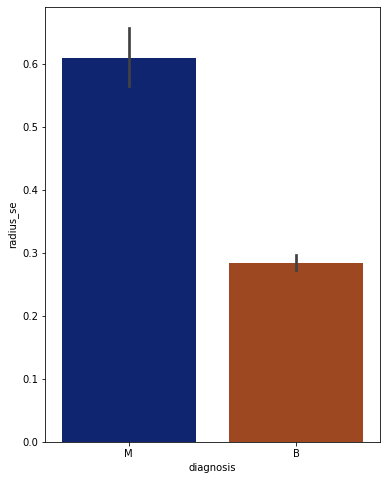

In [11]:
plt.figure(figsize=(6,8))
sns.barplot(x="diagnosis", y="radius_se", data=cancer_data, palette="dark")
print(cancer_data.diagnosis.value_counts())

In [12]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
describe=cancer_data.describe()
describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
# 'm' stands for malignant i.e. 1 and 0 is for benign
diagnosed=pd.get_dummies(cancer_data["diagnosis"], drop_first=True)
diagnosed

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [15]:
cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
cancer_data.drop("diagnosis", inplace=True, axis=1)
cancer_data.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
cancer_data=pd.concat([cancer_data,diagnosed],axis=1)

In [18]:
cancer_data.tail(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [19]:
cancer_data=cancer_data.rename(columns={"M":"Malig"})
cancer_data.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malig
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# correlation

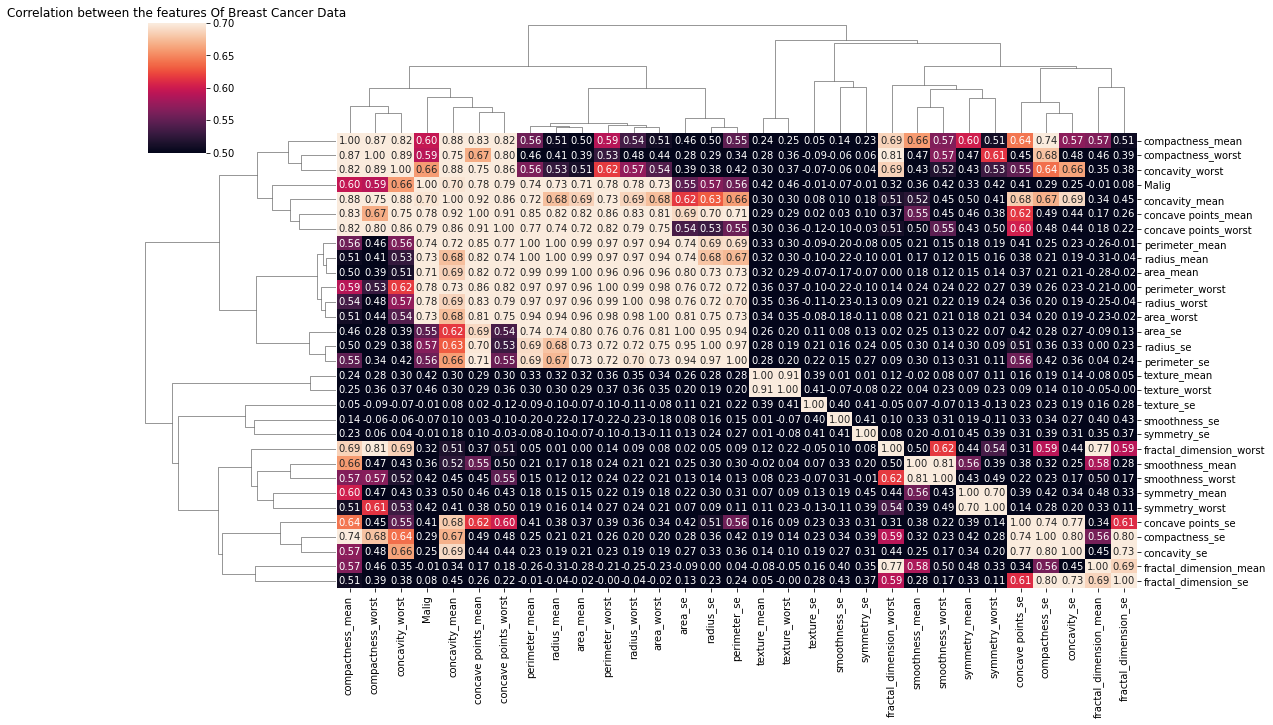

In [20]:
corr_matrix=cancer_data.corr()
sns.clustermap(corr_matrix, figsize=(16,10), annot=True, fmt=".2f", vmin=0.5, vmax=0.7)
#we can vary the color by using the following too.
# sns.clustermap(corr_matrix, figsize=(16,10), annot=True, fmt=".2f", cmap="PiYG")
# sns.clustermap(corr_matrix, figsize=(16,10), annot=True, fmt=".2f", center=1)
# sns.clustermap(corr_matrix, figsize=(16,10), annot=True, fmt=".2f", cmap="Blues")
# sns.clustermap(corr_matrix, figsize=(16,10), annot=True, fmt=".2f")
plt.title("Correlation between the features Of Breast Cancer Data")
plt.show()

In [21]:
threshold = 0.75
filterr = np.abs(corr_matrix["Malig"]) > threshold
corr_features = corr_matrix.columns[filterr].tolist()
print(filterr,corr_features)

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst        True
symmetry_worst             False
fractal_dimension_worst    False
Malig     

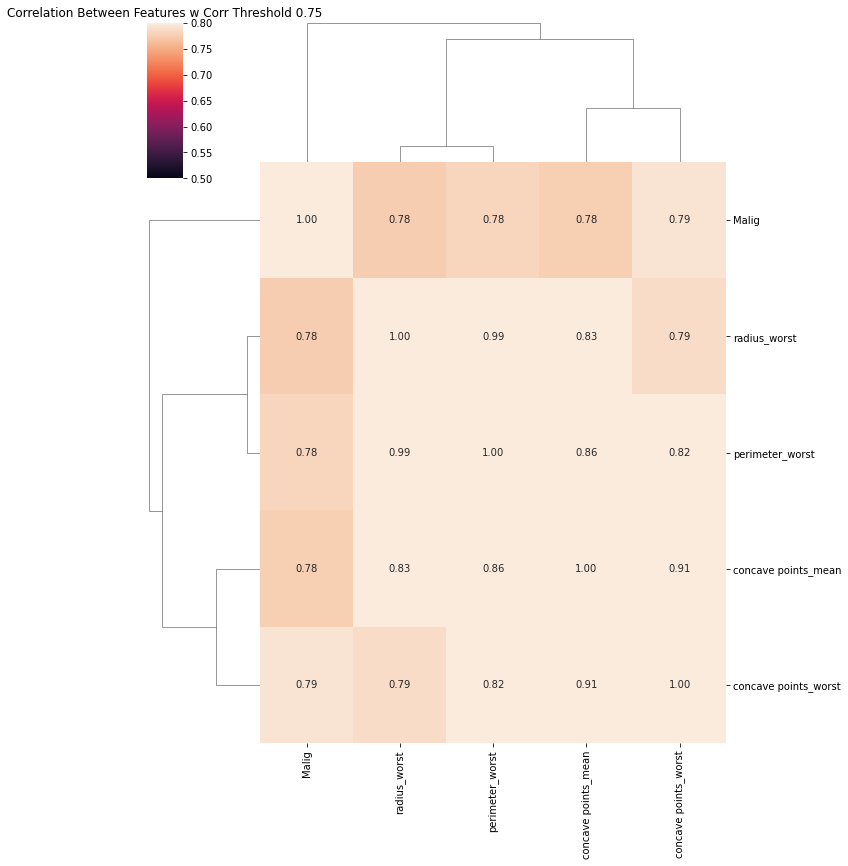

In [22]:
#correlation table for threshold >0.75
new_corr=corr_matrix.loc[corr_features, corr_features]
sns.clustermap(new_corr,figsize=(10,12), annot=True, fmt=".2f", vmin=0.5, vmax=0.8)
plt.title("Correlation Between Features w Corr Threshold 0.75")

plt.show()


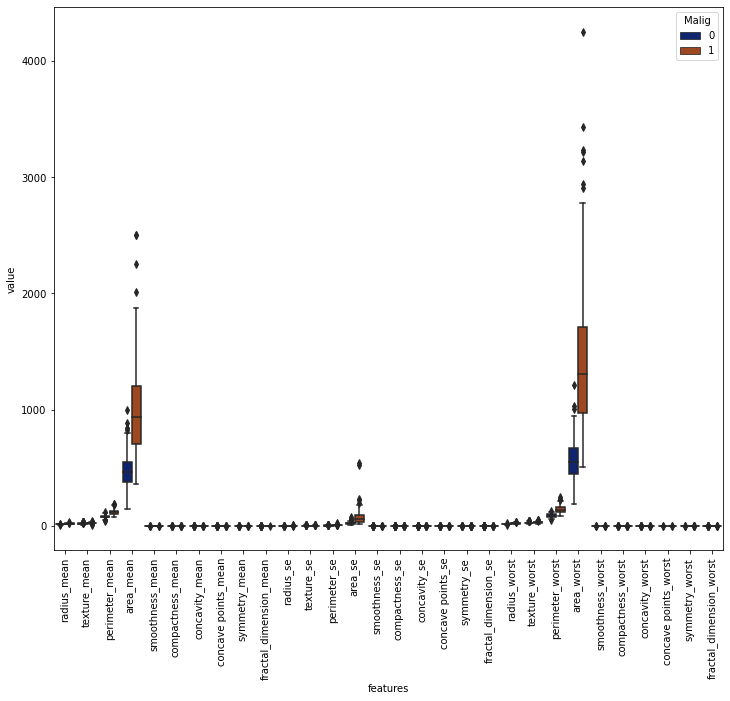

In [23]:
cancer_data_long=pd.melt(cancer_data, id_vars="Malig", var_name="features", value_name="value")
plt.figure(figsize=(12,10))
#sns.barplot(x="features", y="value", hue="Malig", data=cancer_data_long, palette="dark")
sns.boxplot(x="features", y="value", hue="Malig", data=cancer_data_long, palette="dark")
plt.xticks(rotation=90)
plt.show()

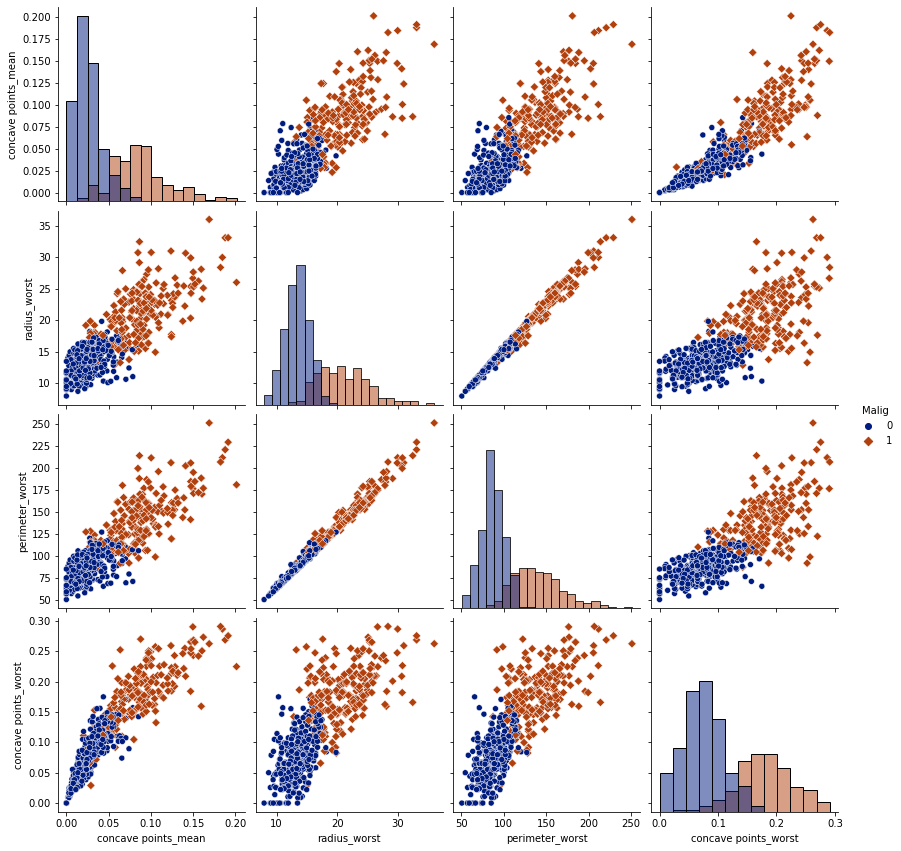

In [24]:
sns.pairplot(cancer_data[corr_features], diag_kind="hist", markers=["o","D"], hue="Malig", height=3,palette="dark")
plt.show()

# Train And Test

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [26]:
corr_features.pop()
corr_features

['concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

In [27]:
x=cancer_data[corr_features]
y=cancer_data["Malig"]

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)


In [29]:
x_train.shape


(398, 4)

In [30]:
x_test.shape

(171, 4)

In [31]:
y_train.shape

(398,)

In [32]:
y_test.shape

(171,)

# Standardization

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)



In [34]:
X_train_frame=pd.DataFrame(X_train, columns=corr_features)
X_train_describe=X_train_frame.describe()


In [35]:
X_train_describe

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.383595e-16,5.936067e-16,-3.012665e-16,8.703256e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.286097e+00,-1.587373e+00,-1.600220e+00,-1.784161e+00
25%,-7.367012e-01,-6.701191e-01,-6.906849e-01,-7.829110e-01
50%,-3.804602e-01,-2.737620e-01,-2.911130e-01,-2.283327e-01
75%,6.776427e-01,5.048709e-01,5.428353e-01,7.297391e-01
max,4.055859e+00,4.120586e+00,4.353182e+00,2.535233e+00


In [36]:
X_train_frame['Malig']=y_train

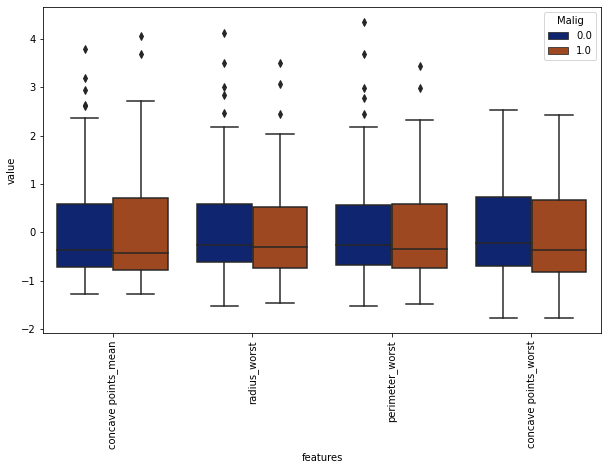

In [37]:
#bboxplot
long_cancer_data=pd.melt(X_train_frame, id_vars="Malig", var_name="features", value_name="value")
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value",hue="Malig",data=long_cancer_data, palette="dark")
plt.xticks(rotation=90)
plt.show()

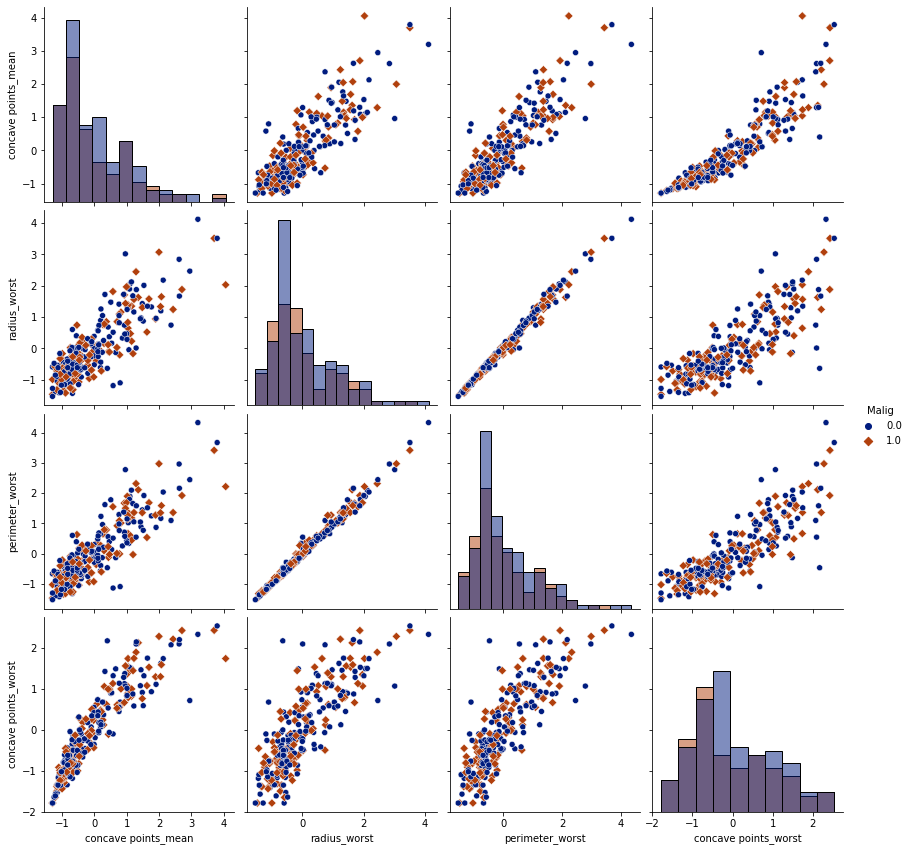

In [38]:
sns.pairplot(X_train_frame, diag_kind="hist", markers=["o","D"], hue="Malig", height=3,palette="dark")
plt.show()


# Training The Models...

# 1. Using Logistic Regression Algorithm

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
LRpredicted_test=logreg.predict(x_test)


In [43]:
# code for the confusion matrix
def matrix_accuracy(tested_labels, predicted_labels):
    class_name=["benign", "malig"]
    the_matrix=confusion_matrix(tested_labels, predicted_labels)
    fig, ax=plt.subplots()
    tick_marks=np.arange(len(class_name))
    plt.xticks(tick_marks, class_name)
    plt.yticks(tick_marks, class_name)
    #create the heatmap
    sns.heatmap(pd.DataFrame(the_matrix), annot=True, cmap="tab20", fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("confusion matrix for breast cancer prediction",y=1.2)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
    accuracy=accuracy_score(tested_labels, predicted_labels)
    print("the accuracy obtained is :- ", accuracy*100)
    report=classification_report(tested_labels, predicted_labels)
    print(report)


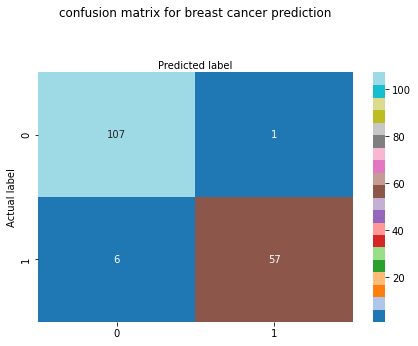

the accuracy obtained is :-  95.90643274853801
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [44]:
matrix_accuracy(y_test, LRpredicted_test)

##### Even on applying grid search, the parameters couldn't improve it's accuracy. hence it is not presented here.

# 2. Using SVM Algorithm

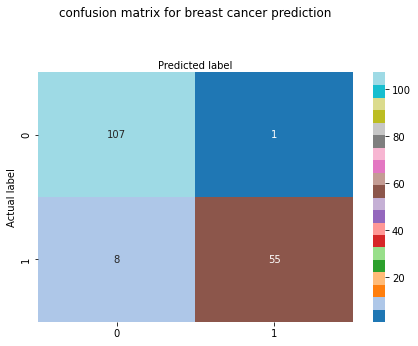

the accuracy obtained is :-  94.73684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [45]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
svm_predicted_test=svc.predict(x_test)
matrix_accuracy(y_test, svm_predicted_test)


# 3. Using Naive Bayes


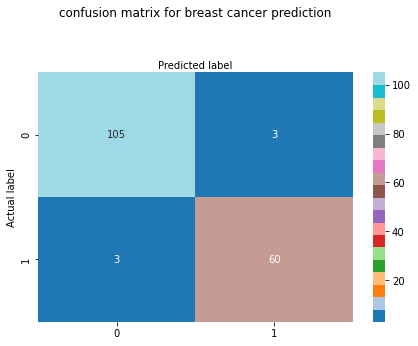

the accuracy obtained is :-  96.49122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [46]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(x_train, y_train)
NB_predicted_test=naive_bayes.predict(x_test)
matrix_accuracy(y_test, NB_predicted_test)

# 4. Using K Nearest Neighbors

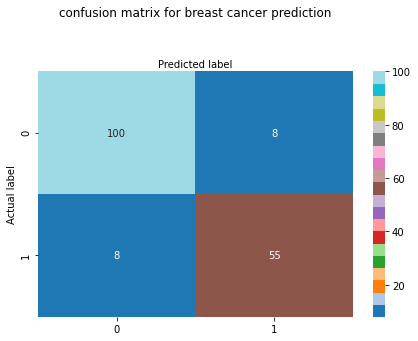

the accuracy obtained is :-  90.64327485380117
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.87      0.87      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predicted_test=knn.predict(x_test)
matrix_accuracy(y_test, knn_predicted_test)

#### To improve the accuracy, we'll try to find out the best values of Parameters

In [48]:
from sklearn.neighbors import KNeighborsClassifier
parameters=[{'n_neighbors':[5,6,7,8,9,10], 'weights':["uniform", "distance"],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[30,35,40,45,50],'p':[1,2]}]
knn_best_params=GridSearchCV(KNeighborsClassifier(), parameters, scoring="accuracy")
knn_best_params.fit(x_train, y_train)
print(knn_best_params.best_params_)


{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


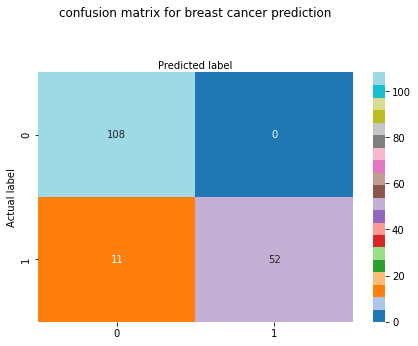

the accuracy obtained is :-  93.56725146198829
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(x_train, y_train)
knn_predicted_test1=knn.predict(x_test)
matrix_accuracy(y_test, knn_predicted_test1)

### As it can be observed, the accuracy of the model increased by approximately 3%

#### finally,, we can compare the models and find out which one worked the best for us.
#### * LogisticRegression(95.9% accuracy)
#### * SVM(94.7% accuracy)
#### * Naive Bayes(96.4% accuracy)
#### * KNN(93.5% accuracy) 
#### It can be said that the LogisticRegression and Naive Bayes worked the best and the remaining i.e. KNN and SVM were also close enough. 